In [49]:
# new jupyter project notebook file
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [50]:
#import data file
data_file = Path("Resources/diabetes_binary_health_indicators_BRFSS2015.csv")

In [51]:
#look at datafile
data_file_df = pd.read_csv(data_file)
data_file_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [52]:
#To check for the Duplicate value
duplicate_values = data_file_df.duplicated().sum()
duplicate_values
#duplicate values was 24206
len(data_file_df)
#total count =253680


253680

In [53]:
# To remove the duplicated values
data_file_df.drop_duplicates(inplace = True)
len(data_file_df)

229474

In [54]:
#show datatypes
data_file_df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [55]:
#show subset of columns to analyse
diabetes_age_sex_bmi = data_file_df[["Diabetes_binary", "BMI","Sex","Age"]]
diabetes_age_sex_bmi.head(10)

,Diabetes_binary,BMI,Sex,Age
0,0.0,40.0,0.0,9.0
1,0.0,25.0,0.0,7.0
2,0.0,28.0,0.0,9.0
3,0.0,27.0,0.0,11.0
4,0.0,24.0,0.0,11.0
5,0.0,25.0,1.0,10.0
6,0.0,30.0,0.0,9.0
7,0.0,25.0,0.0,11.0
8,1.0,30.0,0.0,9.0
9,0.0,24.0,1.0,8.0


In [56]:
#GROUP BMI into buckets

df1=diabetes_age_sex_bmi
#set range for BMI
bins = [0,18,25,30,100]
#name the ranges
group_names=['Underweight','Healthy','Overweight','Obese']
#new column
df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)

df1.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\2164732836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP
0,0.0,40.0,0.0,9.0,Obese
1,0.0,25.0,0.0,7.0,Healthy
2,0.0,28.0,0.0,9.0,Overweight
3,0.0,27.0,0.0,11.0,Overweight
4,0.0,24.0,0.0,11.0,Healthy
5,0.0,25.0,1.0,10.0,Healthy
6,0.0,30.0,0.0,9.0,Overweight
7,0.0,25.0,0.0,11.0,Healthy
8,1.0,30.0,0.0,9.0,Overweight
9,0.0,24.0,1.0,8.0,Healthy


In [57]:
#GROUP Age into buckets

df2=df1

#set range for Age
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#name the ranges
group_names=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
#new column
df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)

df2.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\4108418551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74
5,0.0,25.0,1.0,10.0,Healthy,65-69
6,0.0,30.0,0.0,9.0,Overweight,60-64
7,0.0,25.0,0.0,11.0,Healthy,70-74
8,1.0,30.0,0.0,9.0,Overweight,60-64
9,0.0,24.0,1.0,8.0,Healthy,55-59


In [58]:
#set bmi_group as index
# df_bmi = df2.set_index("BMI_GROUP")
df_bmi = df2.reindex()
df_bmi.head()

,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74


In [123]:
#format to age by diabetes
df_bmi_plot = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]]
df_bmi_plot

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0
253677,25-29,Overweight,0.0
253678,50-54,Healthy,0.0


In [140]:
# df_bmi_plot_diabetics = df_bmi.loc[df_bmi['Diabetes_binary'] == 1]
# df_bmi_plot_ = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
df_bmi_plot_diabetics = df_bmi_plot.loc[:, ["Age_GROUP","BMI_GROUP","Diabetes_binary"]]
df_bmi_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0
253677,25-29,Overweight,0.0
253678,50-54,Healthy,0.0


In [141]:
#filter with BMI_GROUP not healthy and diabetic
df_bmi_age_plot_diabetics = df_bmi_plot_diabetics.loc[df_bmi['BMI_GROUP'] != 'Healthy']
df_bmi_age_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
8,60-64,Overweight,1.0
...,...,...,...
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0


In [142]:
print(df_bmi_age_plot_diabetics['BMI_GROUP'].unique())

['Obese', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Healthy' < 'Overweight' < 'Obese']


In [143]:
df_bmi_age_plot_diabetics = pd.DataFrame(df_bmi_age_plot_diabetics)
df_bmi_age_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
8,60-64,Overweight,1.0
...,...,...,...
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0


In [144]:
#filter with BMI_GROUP not healthy and diabetic only
df_bmi_age_plot_diabetics = df_bmi_plot_diabetics.loc[df_bmi['Diabetes_binary'] == 1]
df_bmi_age_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
8,60-64,Overweight,1.0
10,80+,Healthy,1.0
13,70-74,Overweight,1.0
17,50-54,Healthy,1.0
23,80+,Overweight,1.0
...,...,...,...
253659,45-49,Obese,1.0
253668,65-69,Overweight,1.0
253670,80+,Healthy,1.0
253676,70-74,Underweight,1.0


In [173]:
#drop column
df_bmi_age_plot_diabetics.drop('BMI_GROUP', axis=1, inplace=True)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\3167721565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi_age_plot_diabetics.drop('BMI_GROUP', axis=1, inplace=True)


In [180]:

diabetics_by_age_diabetics = df_bmi_age_plot_diabetics.groupby('Age_GROUP')
diabetics_by_age_diabetics

In [186]:
grouped_sum = diabetics_by_age_diabetics.sum()

In [187]:
grouped_sum = grouped_sum.reset_index()

In [188]:
# Display the resulting DataFrame with the reset index
print(grouped_sum)

   Age_GROUP  Diabetes_binary
0      18-24             78.0
1      25-29            140.0
2      30-34            314.0
3      35-39            625.0
4      40-44           1049.0
5      45-49           1741.0
6      50-54           3072.0
7      55-59           4241.0
8      60-64           5681.0
9      65-69           6483.0
10     70-74           5090.0
11     75-79           3383.0
12       80+           3200.0


<Axes: xlabel='Age_GROUP'>

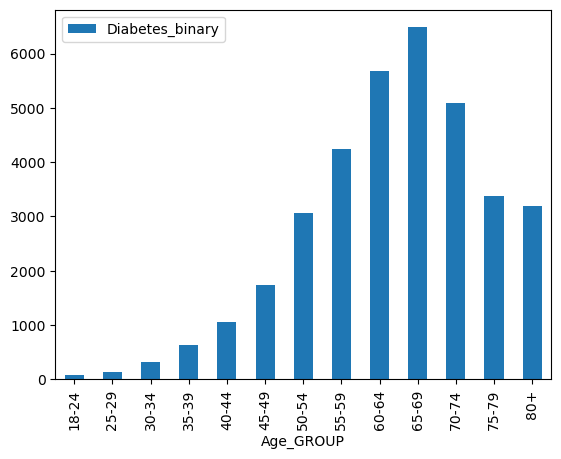

In [194]:
grouped_sum.plot(kind='bar', x='Age_GROUP', y='Diabetes_binary')

In [189]:
#save to cleaned csv
filepath = Path('Resources/cleaned_age_by_bmi_diabetics.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_bmi_age_plot_diabetics.to_csv(filepath)

In [200]:
# same for people without
df_bmi_plot.head(100)

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
95,60-64,Healthy,1.0
96,30-34,Obese,1.0
97,60-64,Obese,0.0
98,70-74,Overweight,0.0


In [201]:
df_bmi_age_plot_non_diabetics = df_bmi_plot.loc[df_bmi['BMI_GROUP'] != 'Healthy']
df_bmi_age_plot_non_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
8,60-64,Overweight,1.0
...,...,...,...
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0


In [202]:
#filter with BMI_GROUP not healthy and diabetic only
df_bmi_age_plot_non_diabetics = df_bmi_age_plot_non_diabetics.loc[df_bmi['Diabetes_binary'] == 0]
df_bmi_age_plot_non_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
11,65-69,Obese,0.0
...,...,...,...
253672,75-79,Overweight,0.0
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0


In [203]:
df_bmi_age_plot_non_diabetics.drop('BMI_GROUP', axis=1, inplace=True)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\1526930865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi_age_plot_non_diabetics.drop('BMI_GROUP', axis=1, inplace=True)


In [204]:
diabetics_by_age_non_diabetics = df_bmi_age_plot_non_diabetics.groupby('Age_GROUP')
diabetics_by_age_non_diabetics

In [206]:
grouped_sum_nondiabetics = diabetics_by_age_non_diabetics.count()

grouped_sum_nondiabetics = grouped_sum_nondiabetics.reset_index()

print(grouped_sum_nondiabetics)

   Age_GROUP  Diabetes_binary
0      18-24             2581
1      25-29             4004
2      30-34             6170
3      35-39             7730
4      40-44             8855
5      45-49            10812
6      50-54            13830
7      55-59            15730
8      60-64            16109
9      65-69            15108
10     70-74            10909
11     75-79             7285
12       80+             6969


<Axes: xlabel='Age_GROUP'>

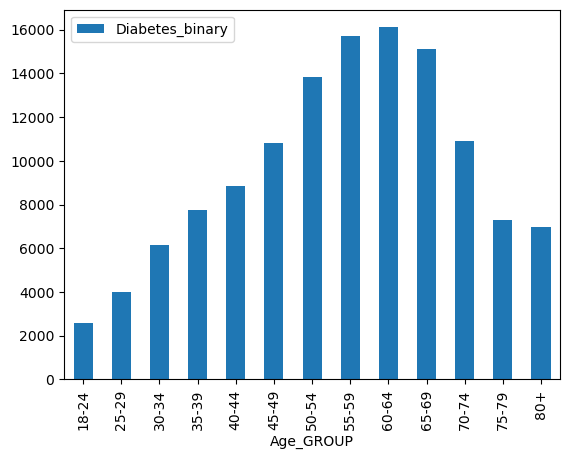

In [240]:
grouped_sum_nondiabetics.plot(kind='bar', x='Age_GROUP', y='Diabetes_binary')

In [242]:
filepath = Path('Resources/diabetics_bmi_age.png')
grouped_sum_nondiabetics.savefig(filepath)

AttributeError: 'DataFrame' object has no attribute 'savefig'

In [228]:
nondiabetics_pd = pd.DataFrame(grouped_sum_nondiabetics)

In [229]:
nondiabetics_pd = nondiabetics_pd.rename(columns={'Diabetes_binary': 'Diabetics'})

In [230]:
diabetics_pd = pd.DataFrame(grouped_sum)

In [231]:
diabetics_pd = diabetics_pd.rename(columns={'Diabetes_binary': 'Non-Diabetics'})

In [232]:
nondiabetics_pd.head(100)

,Age_GROUP,Diabetics
0,18-24,2581
1,25-29,4004
2,30-34,6170
3,35-39,7730
4,40-44,8855
5,45-49,10812
6,50-54,13830
7,55-59,15730
8,60-64,16109
9,65-69,15108


In [233]:
diabetics_pd.head(100)

,Age_GROUP,Non-Diabetics
0,18-24,78.0
1,25-29,140.0
2,30-34,314.0
3,35-39,625.0
4,40-44,1049.0
5,45-49,1741.0
6,50-54,3072.0
7,55-59,4241.0
8,60-64,5681.0
9,65-69,6483.0


In [234]:
#merge 2 to create 1 pd
merged_df = diabetics_pd.merge(nondiabetics_pd, on='Age_GROUP', how='inner')
merged_df.head(10)

,Age_GROUP,Non-Diabetics,Diabetics
0,18-24,78.0,2581
1,25-29,140.0,4004
2,30-34,314.0,6170
3,35-39,625.0,7730
4,40-44,1049.0,8855
5,45-49,1741.0,10812
6,50-54,3072.0,13830
7,55-59,4241.0,15730
8,60-64,5681.0,16109
9,65-69,6483.0,15108


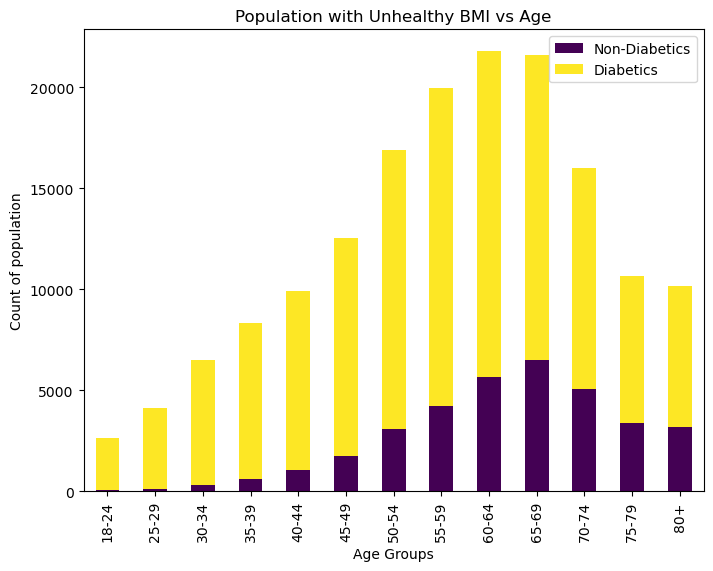

In [236]:
# Group the data by the 'common_column' and sum the values in 'data1_column' and 'data2_column'
grouped_df = merged_df.groupby('Age_GROUP').sum()

# Create a stacked bar plot
ax = grouped_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count of population')
plt.title('Population with Unhealthy BMI vs Age')

# Show the plot
plt.show()

In [237]:
#save to cleaned csv
filepath = Path('Resources/merged_age_by_bmi.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
merged_df.to_csv(filepath)

In [226]:
#Males(1) and Females(0) with physical health or injury (1-30days)
#show subset of columns to analyse
diabetes_sex_health = data_file_df[["Diabetes_binary","Sex","PhysHlth"]]
diabetes_sex_health.head(10)

,Diabetes_binary,Sex,PhysHlth
0,0.0,0.0,15.0
1,0.0,0.0,0.0
2,0.0,0.0,30.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,1.0,2.0
6,0.0,0.0,14.0
7,0.0,0.0,0.0
8,1.0,0.0,30.0
9,0.0,1.0,0.0


In [246]:
#create array of Males with and without diabetes
#Males
diabetes_male_diabetics = diabetes_sex_health.loc[(diabetes_sex_health['Sex'] == 1) & (diabetes_sex_health['PhysHlth'] != 0)]

diabetes_male_diabetics = diabetes_male_diabetics.groupby('Diabetes_binary')

diabetes_male_count = diabetes_male_diabetics['Diabetes_binary'].count()
diabetes_male_count

Diabetes_binary
0.0    28848
1.0     8003
Name: Diabetes_binary, dtype: int64

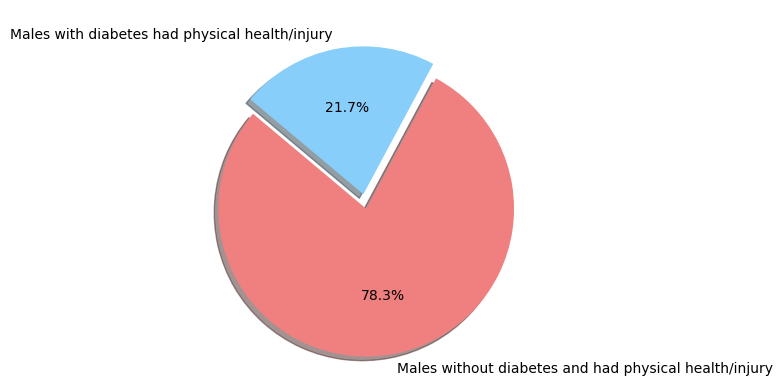

In [248]:
#pie chart of male with/out diabetes
# Labels for the sections of our pie chart
labels = ["Males without diabetes and had physical health/injury", "Males with diabetes had physical health/injury"]

# The values of each section of the pie chart
sizes = [28848,8003]

# The colours of each section of the pie chart
colours = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [235]:
#create array of females with and without diabetes
#Females
diabetes_female_diabetics = diabetes_sex_health.loc[(diabetes_sex_health['Sex'] == 0) & (diabetes_sex_health['PhysHlth'] != 0)]

diabetes_female_diabetics = diabetes_female_diabetics.groupby('Diabetes_binary')

diabetes_female_diabetics = diabetes_female_diabetics['Diabetes_binary'].count()
diabetes_female_diabetics

Diabetes_binary
0.0    110370
1.0     18345
Name: Diabetes_binary, dtype: int64

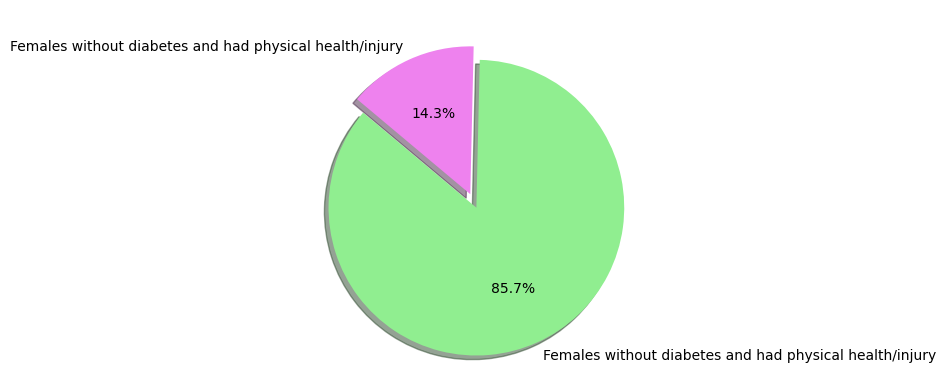

In [250]:
#pie chart of female with/out diabetes
# Labels for the sections of our pie chart
labels = ["Females without diabetes and had physical health/injury", "Females without diabetes and had physical health/injury"]

# The values of each section of the pie chart
sizes = [110370,18345]

# The colours of each section of the pie chart
colours = ["lightgreen", "violet"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [244]:
#show subset of columns to analyse
diabetes_gen_health = data_file_df[["Diabetes_binary","GenHlth","AnyHealthcare"]]
diabetes_gen_health.head(10)

,Diabetes_binary,GenHlth,AnyHealthcare
0,0.0,5.0,1.0
1,0.0,3.0,0.0
2,0.0,5.0,1.0
3,0.0,2.0,1.0
4,0.0,2.0,1.0
5,0.0,2.0,1.0
6,0.0,3.0,1.0
7,0.0,3.0,1.0
8,1.0,5.0,1.0
9,0.0,2.0,1.0


In [246]:
#subset diabetics with no healthcare with genhealth
diabetes_gen_health_diabetes = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 0) & (diabetes_gen_health['Diabetes_binary'] == 1)]
diabetes_gen_health_diabetes

,Diabetes_binary,GenHlth,AnyHealthcare
96,1.0,4.0,0.0
150,1.0,4.0,0.0
406,1.0,4.0,0.0
417,1.0,3.0,0.0
452,1.0,3.0,0.0
...,...,...,...
252137,1.0,4.0,0.0
252171,1.0,4.0,0.0
252364,1.0,4.0,0.0
252452,1.0,3.0,0.0


<Axes: title={'center': 'Diabetics with no Healthcare - physical score'}>

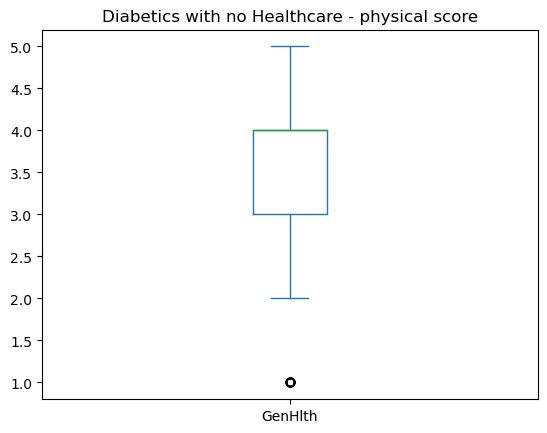

In [248]:
diabetes_gen_health_diabetes['GenHlth'].plot(kind='box', title='Diabetics with no Healthcare - physical score')

In [249]:
#subset diabetics with no healthcare with genhealth
diabetes_gen_health_diabetes2 = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 1) & (diabetes_gen_health['Diabetes_binary'] == 1)]
diabetes_gen_health_diabetes2

,Diabetes_binary,GenHlth,AnyHealthcare
8,1.0,5.0,1.0
10,1.0,3.0,1.0
13,1.0,4.0,1.0
17,1.0,2.0,1.0
23,1.0,1.0,1.0
...,...,...,...
253659,1.0,4.0,1.0
253668,1.0,2.0,1.0
253670,1.0,5.0,1.0
253676,1.0,4.0,1.0


<Axes: title={'center': 'Diabetics with Healthcare - physical score'}>

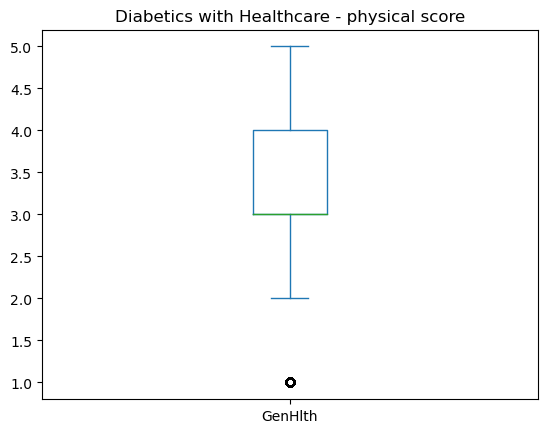

In [250]:
diabetes_gen_health_diabetes2['GenHlth'].plot(kind='box', title='Diabetics with Healthcare - physical score')

In [251]:
#subset non diabetics with no healthcare with genhealth
diabetes_gen_health_diabetes3 = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 0) & (diabetes_gen_health['Diabetes_binary'] == 0)]
diabetes_gen_health_diabetes3

,Diabetes_binary,GenHlth,AnyHealthcare
1,0.0,3.0,0.0
31,0.0,1.0,0.0
38,0.0,1.0,0.0
45,0.0,3.0,0.0
46,0.0,2.0,0.0
...,...,...,...
253526,0.0,1.0,0.0
253545,0.0,1.0,0.0
253575,0.0,1.0,0.0
253607,0.0,1.0,0.0


<Axes: title={'center': 'Non-Diabetics with no Healthcare - physical score'}>

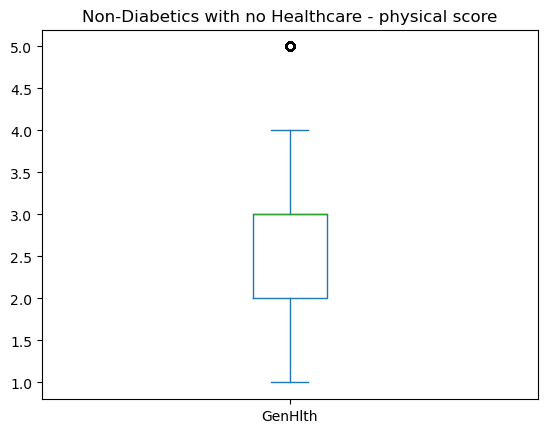

In [252]:
diabetes_gen_health_diabetes3['GenHlth'].plot(kind='box', title='Non-Diabetics with no Healthcare - physical score')

In [253]:
#subset non diabetics with healthcare with genhealth
diabetes_gen_health_diabetes4 = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 1) & (diabetes_gen_health['Diabetes_binary'] == 1)]
diabetes_gen_health_diabetes4

,Diabetes_binary,GenHlth,AnyHealthcare
8,1.0,5.0,1.0
10,1.0,3.0,1.0
13,1.0,4.0,1.0
17,1.0,2.0,1.0
23,1.0,1.0,1.0
...,...,...,...
253659,1.0,4.0,1.0
253668,1.0,2.0,1.0
253670,1.0,5.0,1.0
253676,1.0,4.0,1.0


<Axes: title={'center': 'Non-Diabetics with Healthcare - physical score'}>

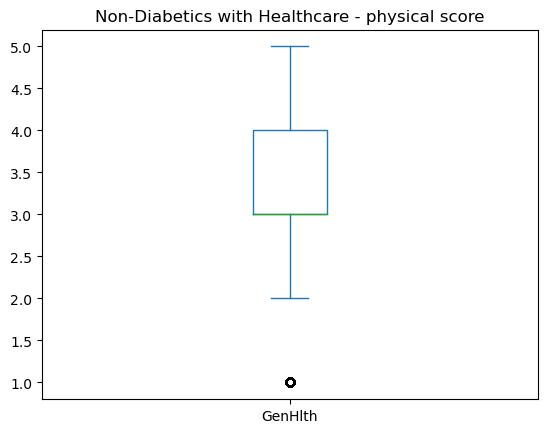

In [254]:
diabetes_gen_health_diabetes4['GenHlth'].plot(kind='box', title='Non-Diabetics with Healthcare - physical score')

In [2]:
#Sujatha part #slides 1 - 6

import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


In [3]:
file_path = Path("Resources/diabetes_binary_health_indicators_BRFSS2015.csv")
health_indicator_df = pd.read_csv(file_path)
health_indicator_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
health_indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
health_indicator_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
#To check for null values

null_values=health_indicator_df.isnull().sum().sum()
null_values


0

In [7]:
#To check for the Duplicate value
duplicate_values =health_indicator_df.duplicated().sum()
duplicate_values
#duplicate values was 24206
len(health_indicator_df)
#total count =253680

253680

In [8]:
# To remove the duplicated values
health_indicator_df.drop_duplicates(inplace = True)
len(health_indicator_df)

229474

In [9]:
#Show the subset of the original Dataframe
bmi_heart_df =health_indicator_df[["BMI","HeartDiseaseorAttack"]]
bmi_heart_df

,BMI,HeartDiseaseorAttack
0,40.0,0.0
1,25.0,0.0
2,28.0,0.0
3,27.0,0.0
4,24.0,0.0
...,...,...
253675,45.0,0.0
253676,18.0,0.0
253677,28.0,0.0
253678,23.0,0.0


In [10]:
#BMI and HeartDisease

#Under 18.5  is Underweight
#Between 18.5 and 24.9 - Healthy
#Between 25 and 29.9 - Overweight
#Between 30 and 39.9 Obesity

bh_df = bmi_heart_df
#set range for BMI
bins = [0,18,25,30,100]
#name the ranges
group_names=['Underweight','Healthy','Overweight','Obese']
#new column
bh_df['BMI_GROUP']=pd.cut(bmi_heart_df['BMI'],bins,labels=group_names)

bh_df

C:\Users\michaelz\AppData\Local\Temp\ipykernel_57576\2465264386.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bh_df['BMI_GROUP']=pd.cut(bmi_heart_df['BMI'],bins,labels=group_names)


,BMI,HeartDiseaseorAttack,BMI_GROUP
0,40.0,0.0,Obese
1,25.0,0.0,Healthy
2,28.0,0.0,Overweight
3,27.0,0.0,Overweight
4,24.0,0.0,Healthy
...,...,...,...
253675,45.0,0.0,Obese
253676,18.0,0.0,Underweight
253677,28.0,0.0,Overweight
253678,23.0,0.0,Healthy


In [11]:
#filter to only heartdisease
bmi_heartdisease_df = bh_df.loc[bh_df['HeartDiseaseorAttack'] == 1]
# df_bmi_plot_ = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
bmi_heartdisease_df = bmi_heartdisease_df.loc[:, ["BMI","HeartDiseaseorAttack","BMI_GROUP"]]
bmi_heartdisease_df

,BMI,HeartDiseaseorAttack,BMI_GROUP
8,30.0,1.0,Overweight
20,22.0,1.0,Healthy
26,37.0,1.0,Obese
27,28.0,1.0,Overweight
47,25.0,1.0,Healthy
...,...,...,...
253668,29.0,1.0,Overweight
253670,25.0,1.0,Healthy
253671,23.0,1.0,Healthy
253672,30.0,1.0,Overweight


In [12]:
#Group by BMI_Group and finding the count of the hear disease per BMI Group
bmi_heart = bmi_heartdisease_df.groupby('BMI_GROUP')
heartdisease_count= bmi_heart['BMI_GROUP'].count()
heartdisease_count

BMI_GROUP
Underweight     331
Healthy        6160
Overweight     8644
Obese          8578
Name: BMI_GROUP, dtype: int64

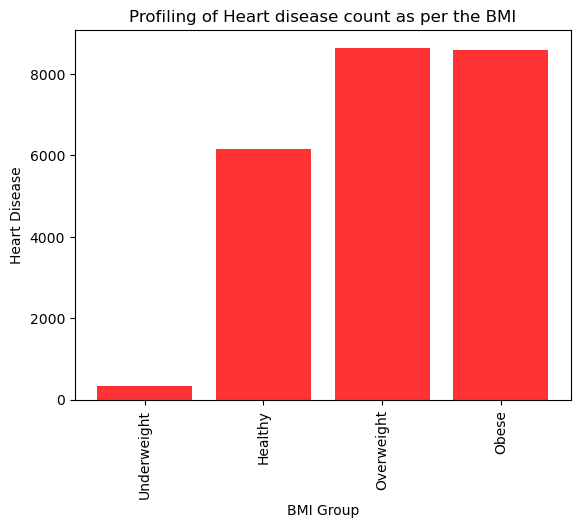

In [13]:
#Bar Chart for BMI vs Heartdisease count
x_axis =heartdisease_count.index.values
x_axis
y_axis = heartdisease_count.values
y_axis
plt.bar(x_axis, y_axis, color='r', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Profiling of Heart disease count as per the BMI")
plt.xlabel("BMI Group")
plt.ylabel("Heart Disease")
plt.xticks(rotation="vertical")
#plt.savefig("/Images/BMI_Heart_Bar.png")
plt.show()


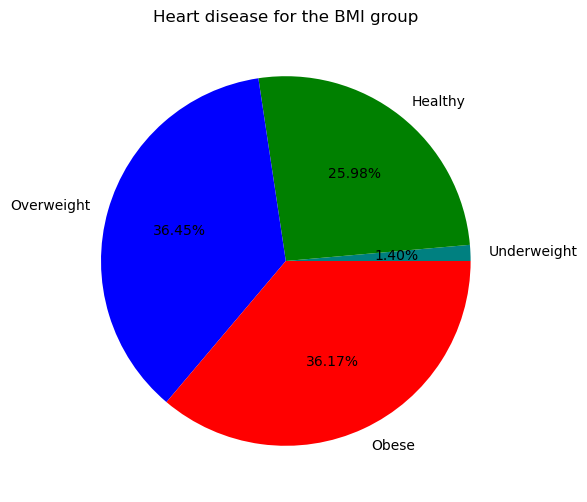

In [16]:
#Pie Chart for BMI with heartdisease
heart_bmi=bmi_heart['BMI_GROUP'].count()
plt.figure(figsize=(10,6))
plt.pie(heart_bmi, labels=['Underweight','Healthy','Overweight','Obese'], autopct='%1.2f%%', colors=['teal','green','blue','red'])
plt.title('Heart disease for the BMI group')
# plt.savefig("/Images/BMI_Heart_Pie.png")
plt.show()

In [17]:
# Calculate the BMI  of each BMI_Group 
#BMI_Group = Underweight,Healthy,Overweight,Obese
reduced_data = bmi_heartdisease_df.loc[(bmi_heartdisease_df["BMI_GROUP"] == "Underweight") | (bmi_heartdisease_df["BMI_GROUP"] == "Healthy") |
                                        (bmi_heartdisease_df["BMI_GROUP"] == "Overweight") |(bmi_heartdisease_df["BMI_GROUP"] == "Obese") ]
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
last_tp = reduced_data.groupby(["BMI_GROUP","BMI"]).last()
new_last_tp = last_tp.reset_index()
reduced_last_tp=new_last_tp[["BMI_GROUP", "BMI"]]
reduced_last_tp

underweight_df= reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Underweight"]
underweight_df

healthy_df = reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Healthy"]
healthy_df

overweight_df = reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Overweight"]
overweight_df

obese_df = reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Obese"]
obese_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.DataFrame({"Underweight": underweight_df["BMI"],"Healthy": healthy_df["BMI"],"Overweight": overweight_df["BMI"],"OBese": obese_df["BMI"]})

new_df

,Underweight,Healthy,Overweight,OBese
0,12.0,NaN,NaN,NaN
1,13.0,NaN,NaN,NaN
2,14.0,NaN,NaN,NaN
3,15.0,NaN,NaN,NaN
4,16.0,NaN,NaN,NaN
...,...,...,...,...
283,NaN,NaN,NaN,87.0
284,NaN,NaN,NaN,90.0
285,NaN,NaN,NaN,92.0
286,NaN,NaN,NaN,95.0


In [18]:
#General Health and Diabetes
generalhealth_diabetes_df = health_indicator_df[["Diabetes_binary","GenHlth"]]
generalhealth_diabetes_df

genhlth_diabetes= generalhealth_diabetes_df
#set range for GenHlth
bins = [0,1,2,3,4,5]
#name the ranges
group_names=['Excellent','Very good','Good','Fair','Poor']
#new column
genhlth_diabetes['GenHlth_GROUP']=pd.cut( generalhealth_diabetes_df['GenHlth'],bins,labels=group_names)

genhlth_diabetes

C:\Users\michaelz\AppData\Local\Temp\ipykernel_57576\3383302749.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genhlth_diabetes['GenHlth_GROUP']=pd.cut( generalhealth_diabetes_df['GenHlth'],bins,labels=group_names)


,Diabetes_binary,GenHlth,GenHlth_GROUP
0,0.0,5.0,Poor
1,0.0,3.0,Good
2,0.0,5.0,Poor
3,0.0,2.0,Very good
4,0.0,2.0,Very good
...,...,...,...
253675,0.0,3.0,Good
253676,1.0,4.0,Fair
253677,0.0,1.0,Excellent
253678,0.0,3.0,Good


In [19]:
#filter to only Diabetes
genhlth_diabetes_df = genhlth_diabetes.loc[genhlth_diabetes['Diabetes_binary'] == 1]
genhlth_diabetes_df = genhlth_diabetes_df.loc[:, ["Diabetes_binary","GenHlth","GenHlth_GROUP"]]
genhlth_diabetes_df


,Diabetes_binary,GenHlth,GenHlth_GROUP
8,1.0,5.0,Poor
10,1.0,3.0,Good
13,1.0,4.0,Fair
17,1.0,2.0,Very good
23,1.0,1.0,Excellent
...,...,...,...
253659,1.0,4.0,Fair
253668,1.0,2.0,Very good
253670,1.0,5.0,Poor
253676,1.0,4.0,Fair


In [20]:
#group by GenHlth_Group
genhlth_diabetes = genhlth_diabetes_df.groupby('GenHlth_GROUP')

genhlth_diabetes_count= genhlth_diabetes['GenHlth_GROUP'].count()
genhlth_diabetes_count


GenHlth_GROUP
Excellent     1135
Very good     6280
Good         13324
Fair          9781
Poor          4577
Name: GenHlth_GROUP, dtype: int64

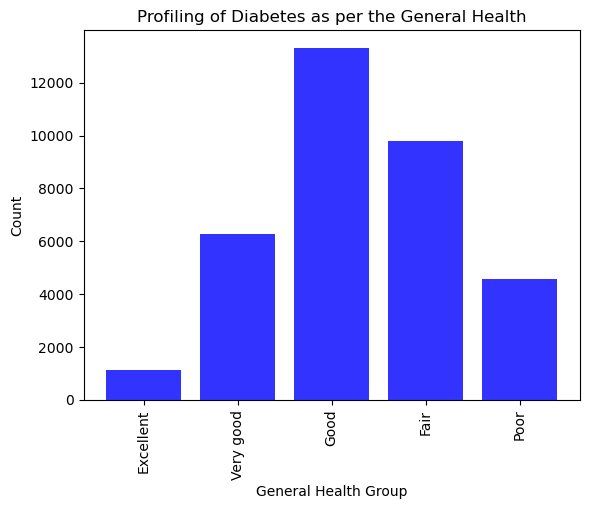

In [21]:
#Bar Chart for the General health group with Diabetes count

x_axis =genhlth_diabetes_count.index.values
x_axis
y_axis = genhlth_diabetes_count.values
y_axis
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Profiling of Diabetes as per the General Health")
plt.xlabel("General Health Group")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

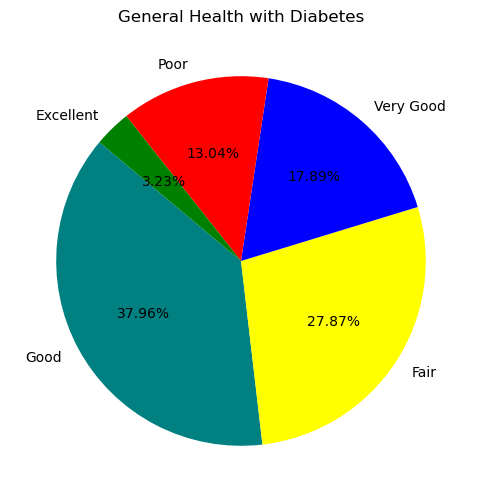

In [22]:
#Pie Chart for the General Health with Diabetes
genhlth_diabetes_df['GenHlth'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(genhlth_diabetes_df['GenHlth'].value_counts(), labels=['Good','Fair','Very Good','Poor','Excellent'], autopct='%1.2f%%', colors=['teal','yellow','blue','red','green'],startangle=140)
plt.title('General Health with Diabetes')
plt.show()

In [23]:
#Analysis of People with Diabetes and HeartDisease compared with the General Health 

#Concatenating the Dataframe 
Heart_Diabetes_GenHlth = pd.concat([bmi_heartdisease_df,genhlth_diabetes_df],axis=1, join="inner")
Heart_Diabetes_GenHlth = Heart_Diabetes_GenHlth.drop(['BMI_GROUP','BMI','Diabetes_binary','HeartDiseaseorAttack' ],axis=1)

#Group by GenHlt_group and get the count of the people with Diabetes and Heart Disease
genhlth_heart_diabetes = Heart_Diabetes_GenHlth.groupby('GenHlth_GROUP')

genhlth_heart_diabetes_count= genhlth_heart_diabetes['GenHlth_GROUP'].count()
genhlth_heart_diabetes_count

#Heart_Diabetes_GenHlth['GenHlth_GROUP'].value_counts()
#GenHlth_GROUP
#Fair         2626
#Good         2312
#Poor         1989
#Very good     781
#Excellent     148

GenHlth_GROUP
Excellent     148
Very good     781
Good         2312
Fair         2626
Poor         1989
Name: GenHlth_GROUP, dtype: int64

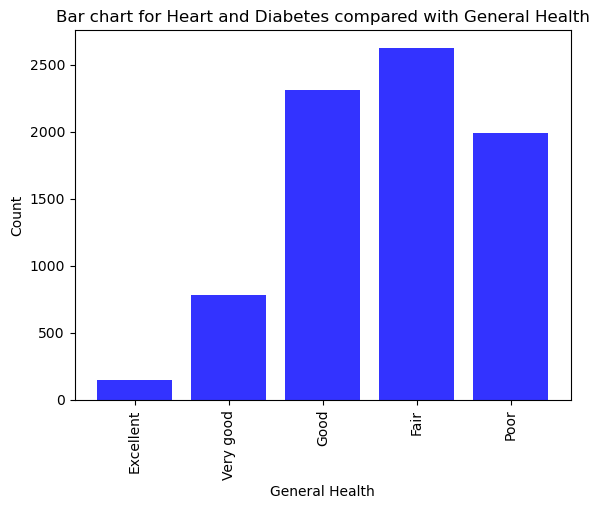

In [24]:
#Bar chart for Heart and Diabetes Vs Genhlt

x_axis =genhlth_heart_diabetes_count.index.values
x_axis
y_axis =genhlth_heart_diabetes_count.values
y_axis
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("General Health")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.title("Bar chart for Heart and Diabetes compared with General Health")
plt.show()

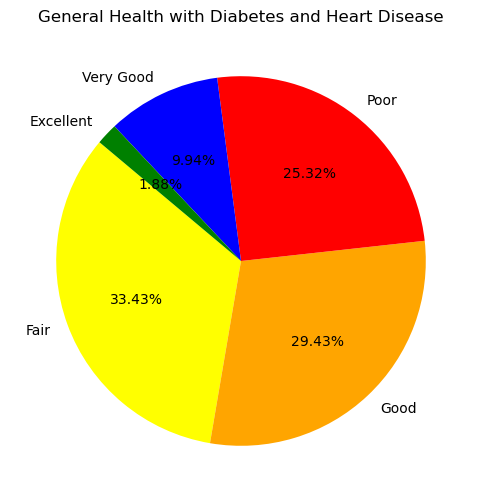

In [25]:
#Pie Chart for the General Health with Diabetes and HeartDisease
Heart_Diabetes_GenHlth['GenHlth_GROUP'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(Heart_Diabetes_GenHlth['GenHlth_GROUP'].value_counts(), labels=['Fair','Good','Poor','Very Good','Excellent'], autopct='%1.2f%%', colors=['yellow','orange','red','blue','green'],startangle=140)
plt.title('General Health with Diabetes and Heart Disease')
plt.show()

In [28]:
# find the  count of people having Heart disease and is Smoker
heart_smoker_df = health_indicator_df[["Smoker","HeartDiseaseorAttack"]]
heart_smoker = heart_smoker_df.loc[((heart_smoker_df["Smoker"] == 1) & (heart_smoker_df["HeartDiseaseorAttack"] ==1))]
heart_smoke=heart_smoker.drop(["Smoker"],axis=1)
smoker=heart_smoke["HeartDiseaseorAttack"].count()

#find the  count of people having Heart disease and is drinker

heart_drink_df = health_indicator_df[["HvyAlcoholConsump","HeartDiseaseorAttack"]]
heart_drinker =  heart_drink_df.loc[((heart_drink_df["HvyAlcoholConsump"] == 1) & (heart_drink_df["HeartDiseaseorAttack"] ==1))]
heart_drink= heart_drinker.drop(["HvyAlcoholConsump"],axis=1)
drinker=heart_drink["HeartDiseaseorAttack"].count()
drinker


#find the  count of people having Heart disease and have high cholesterol

heart_chol_df = health_indicator_df[["HighChol","HeartDiseaseorAttack"]]
heart_chols=  heart_chol_df.loc[((heart_chol_df["HighChol"] == 1) & (heart_chol_df["HeartDiseaseorAttack"] ==1))]
heart_chol =  heart_chols.drop(["HighChol"],axis=1)
chol=heart_chol["HeartDiseaseorAttack"].count()
chol
 

#find the  count of people having Heart disease and have high BP
heart_bp_df =health_indicator_df[["HighBP","HeartDiseaseorAttack"]]
heart_bps =  heart_bp_df.loc[((heart_bp_df ["HighBP"] == 1) & (heart_bp_df ["HeartDiseaseorAttack"] ==1))]
heart_bp= heart_bps.drop(["HighBP"],axis=1)
bp = heart_bp["HeartDiseaseorAttack"].count()
bp


#find the  count of people having Heart disease and Chol Check
heart_cholcheck_df=health_indicator_df[["CholCheck","HeartDiseaseorAttack"]]
heart_chols =  heart_cholcheck_df.loc[((heart_cholcheck_df["CholCheck"] == 1) & (heart_cholcheck_df["HeartDiseaseorAttack"] ==1))]
heart_cholcheck = heart_chols.drop(["CholCheck"],axis=1)
chol_check=heart_cholcheck["HeartDiseaseorAttack"].count()




#find the  count of people having Heart disease and physicalactivity

heart_physical_activity_df = health_indicator_df[["PhysActivity","HeartDiseaseorAttack"]]
heart_physical_activity = heart_physical_activity_df.loc[((heart_physical_activity_df["PhysActivity"] == 1) & (heart_physical_activity_df["HeartDiseaseorAttack"] ==1))]
heart_phy_act= heart_physical_activity.drop(["PhysActivity"],axis=1)
# PhysActivity=df7_2["HeartDiseaseorAttack"].count()


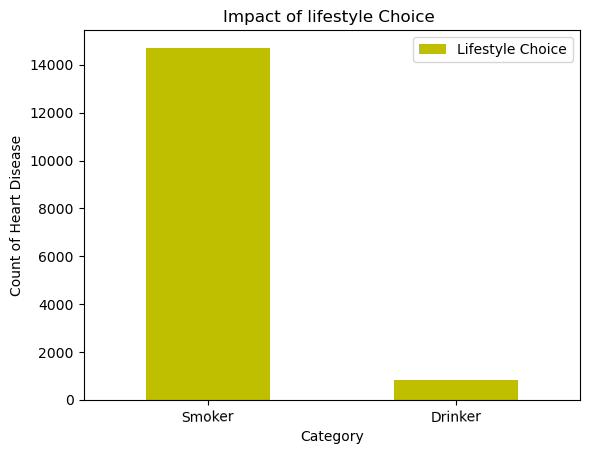

In [29]:
#Bar chart for people who drink and smoke and have heart disease

heart_smoke_drink = pd.DataFrame({'Category':['Smoker', 'Drinker'], 'Lifestyle Choice':[smoker,drinker]})
h_s_d = heart_smoke_drink.plot.bar(x='Category', y = 'Lifestyle Choice', rot=1,ylabel='Count of Heart Disease',title='Impact of lifestyle Choice ',color = 'y')

In [34]:
# find the count for Heart disease & High Cholestrol,High BP,Chol_Check,Physical Activity
 
df_all_H_2= pd.DataFrame({'Category':['High Cholestrol','High BP','Chol_check','PhysActivity'], 'Parameter':[high_Chol, high_BP,Chol_check,PhysActivity]})
ax_H_2 = df_all_H_2.plot.bar(x='Category', y='Parameter', rot=0,title='HeartDisease count for differentCategory',ylabel='Count of Diabetes',color='teal')

NameError: name 'high_Chol' is not defined

In [32]:
# find the  count of people having diabetes and is Smoker

diabetes_smoker_df = health_indicator_df[["Smoker","Diabetes_binary"]]
diabetes_smoker = diabetes_smoker_df.loc[((diabetes_smoker_df["Smoker"] == 1) & (diabetes_smoker_df["Diabetes_binary"] ==1))]
diabetes_smoke=diabetes_smoker.drop(["Smoker"],axis=1)
db_smoker=diabetes_smoke["Diabetes_binary"].count()

#find the  count of people having diabetes and is drinker

diabetes_drink_df = health_indicator_df[["HvyAlcoholConsump","Diabetes_binary"]]
diabetes_drinker =  diabetes_drink_df.loc[((diabetes_drink_df["HvyAlcoholConsump"] == 1) & (diabetes_drink_df["Diabetes_binary"] ==1))]
diabetes_drink= diabetes_drinker.drop(["HvyAlcoholConsump"],axis=1)
db_drinker=diabetes_drink["Diabetes_binary"].count()
db_drinker


#find the  count of people having diabetes and have high cholesterol

diabetes_chol_df = health_indicator_df[["HighChol","Diabetes_binary"]]
diabetes_chols=  diabetes_chol_df.loc[((heart_chol_df["HighChol"] == 1) & (diabetes_chol_df["Diabetes_binary"] ==1))]
diabetes_chol =  diabetes_chols.drop(["HighChol"],axis=1)
db_chol=diabetes_chol["Diabetes_binary"].count()

 

#find the  count of people having diabetes and have high BP
diabetes_bp_df =health_indicator_df[["HighBP","Diabetes_binary"]]
diabetes_bps = diabetes_bp_df.loc[((diabetes_bp_df ["HighBP"] == 1) & (diabetes_bp_df ["Diabetes_binary"] ==1))]
diabetes_bp= diabetes_bps.drop(["HighBP"],axis=1)
db_bp = diabetes_bp["Diabetes_binary"].count()



#find the  count of people having diabetes and Chol Check
diabetes_cholcheck_df=health_indicator_df[["CholCheck","Diabetes_binary"]]
diabetes_chols =  diabetes_cholcheck_df.loc[((diabetes_cholcheck_df["CholCheck"] == 1) & (diabetes_cholcheck_df["Diabetes_binary"] ==1))]
diabetes_cholcheck = diabetes_chols.drop(["CholCheck"],axis=1)
db_chol_check=diabetes_cholcheck["Diabetes_binary"].count()




#find the  count of people having diabetes and physicalactivity

diabetes_physical_activity_df = health_indicator_df[["PhysActivity","Diabetes_binary"]]
diabetes_physical_activity = diabetes_physical_activity_df.loc[((diabetes_physical_activity_df["PhysActivity"] == 1) & (diabetes_physical_activity_df["Diabetes_binary"] ==1))]
diabetes_phy_act= diabetes_physical_activity.drop(["PhysActivity"],axis=1)
db_PhysActivity=diabetes_phy_act["Diabetes_binary"].count()


In [33]:
db_S_P= pd.DataFrame({'Category':['Smoker', 'Drinker'], 'Lifestyle Choice':[db_smoker, db_drinker]})
ax_1 = df_all_1.plot.bar(x='Category', y='Lifestyle Choice', rot=0,ylabel='Count of Diabetes',title = 'Impact of lifestyle Choice',color = 'purple')

NameError: name 'df_all_1' is not defined

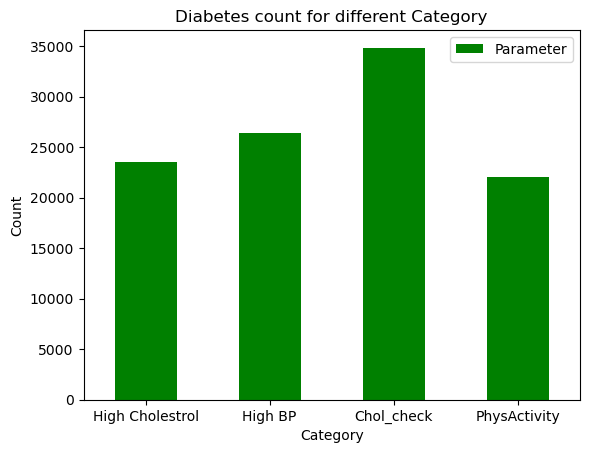

In [35]:
df_all_2 = pd.DataFrame({'Category':['High Cholestrol', 'High BP','Chol_check','PhysActivity'], 'Parameter':[db_chol, db_bp,db_chol_check,db_PhysActivity]})
ax_2 = df_all_2.plot.bar(x='Category', y='Parameter', rot=0,title='Diabetes count for different Category',ylabel='Count',color = 'green')  

<Axes: title={'center': 'BMI'}, xlabel='HeartDiseaseorAttack'>

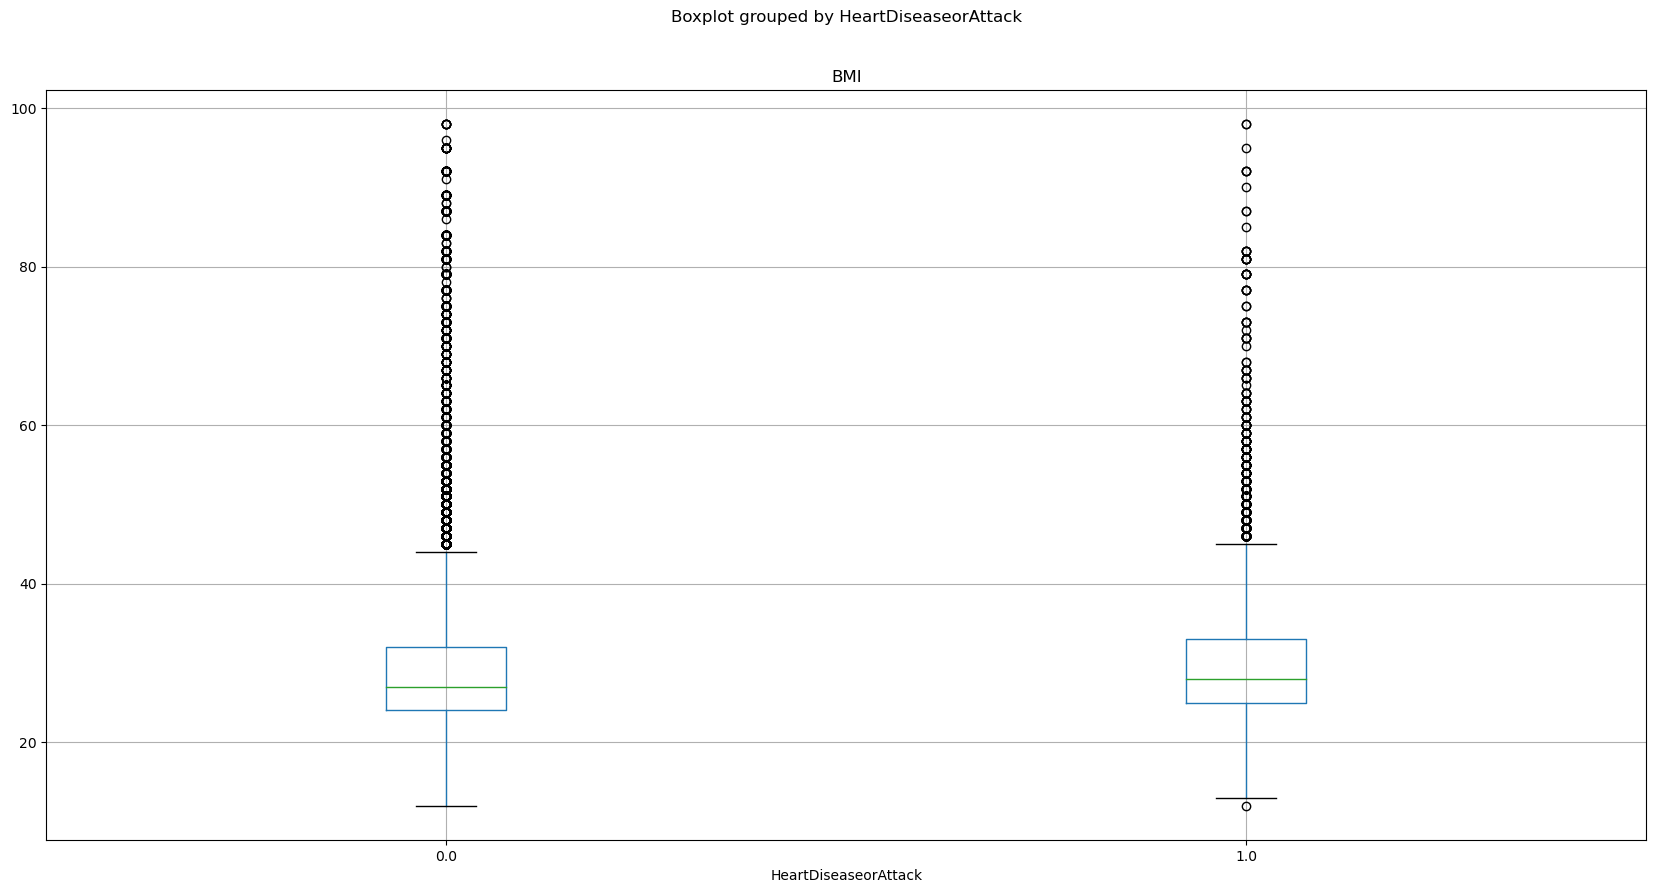

In [36]:
#Pvalue for the BMI_Heart Disease

bmi_heart_df.boxplot("BMI" ,by="HeartDiseaseorAttack", figsize=(20, 10))

In [37]:
group0 = bmi_heart_df[bmi_heart_df["HeartDiseaseorAttack"] == 0.0]["BMI"]
group1 = bmi_heart_df[bmi_heart_df["HeartDiseaseorAttack"] == 1.0]["BMI"]

st.f_oneway(group0, group1)

F_onewayResult(statistic=364.4417363206218, pvalue=3.5119204422859346e-81)

In [38]:
#pvalue for Heartdisease and Alchohol
group0 =df2[bmi_heart_df["HeartDiseaseorAttack"] == 0.0]["HvyAlcoholConsump"]
group1 = df2[bmi_heart_df["HeartDiseaseorAttack"] == 1.0]["HvyAlcoholConsump"]
st.f_oneway(group0, group1)

NameError: name 'df2' is not defined

In [39]:
#Rohit slides 15 -22

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [41]:
diabetes_df = pd.read_csv("Resources/diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [42]:
#finding out number of duplicates
duplicate_values = diabetes_df.duplicated().sum()
print(duplicate_values)
print(len(diabetes_df))

24206
253680


In [43]:
#removing duplicates
diabetes_df.drop_duplicates(inplace = True)
len(diabetes_df)

229474

In [44]:
#finding income range of aveage diabetes sufferer versus average non-diabetes sufferer
mean = diabetes_df.groupby("Diabetes_binary")["Income"].mean()
mean

Diabetes_binary
0.0    6.013705
1.0    5.195829
Name: Income, dtype: float64

In [45]:
#finding likelihood that a member of the surveyed population suffers from diabetes based on income range
mean2 = diabetes_df.groupby("Income")["Diabetes_binary"].mean()
mean2

Income
1.0    0.243387
2.0    0.262504
3.0    0.223869
4.0    0.202827
5.0    0.177249
6.0    0.150471
7.0    0.130224
8.0    0.098297
Name: Diabetes_binary, dtype: float64

In [46]:
diabetes_income = diabetes_df[["Diabetes_binary", "Income"]]

In [47]:
#set range for income
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0, 7.0, 8.0]
#name the ranges
group_names=['<10k','<15k','<20k','<25k', '<35k', '<50k', '<75k', '75k+']
#replace the values of the Income column
diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)

diabetes_income.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_57576\2164680874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)


,Diabetes_binary,Income
0,0.0,<20k
1,0.0,<10k
2,0.0,75k+
3,0.0,<50k
4,0.0,<25k
5,0.0,75k+
6,0.0,<75k
7,0.0,<25k
8,1.0,<10k
9,0.0,<20k


In [48]:
#Finding the mean value of 'Diabetes_binary' for each income level
df_2 = diabetes_income.groupby("Income").mean()

In [49]:
df_2

,Diabetes_binary
Income,
<10k,0.243387
<15k,0.262504
<20k,0.223869
<25k,0.202827
<35k,0.177249
<50k,0.150471
<75k,0.130224
75k+,0.098297


Text(0.5, 1.0, 'Likelihood of having diabetes by income level as a fraction of 1.0')

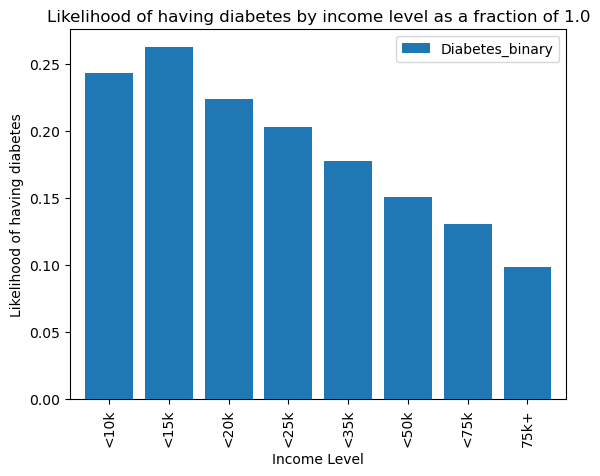

In [50]:
#plotting a bar chart showing how likely survey applicants were to list as Diabetic, based on income range
pd_bar = df_2.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Income Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Likelihood of having diabetes by income level as a fraction of 1.0")


Text(0, 0.5, 'Income Level')

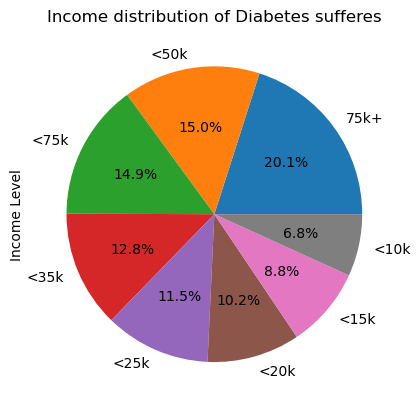

In [51]:
#The above bar chart seems to indicate that generally, the lower the income level, the more likely someone was to be diabetic
#To further explore this relationship, I will take only the respondents that are diabetic, and put this into a pie chart to see how these
#diabetic respondents are distributed according to income ranges 

diabetes_yes_df = diabetes_income.loc[diabetes_income["Diabetes_binary"] == 1.0] 

diabetes_distribution = diabetes_yes_df['Income'].value_counts()

pd_pie = diabetes_distribution.plot(kind='pie', autopct='%1.1f%%', title='Income distribution of Diabetes sufferes')
pd_pie.set_ylabel("Income Level")


In [52]:
#Pie chart gives us a clearer indication- considering the vast majority of Diabetes sufferers were from the higher income brackets

#Performing ANOVA test to see if results are statistically significant
sample_df = diabetes_income.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

groupa = sample_df[sample_df["Income"] == "<10k"]["Diabetes_binary"]
groupb = sample_df[sample_df["Income"] == "<15k"]["Diabetes_binary"]
groupc = sample_df[sample_df["Income"] == "<20k"]["Diabetes_binary"]
groupd = sample_df[sample_df["Income"] == "<25k"]["Diabetes_binary"]
groupe = sample_df[sample_df["Income"] == "<35k"]["Diabetes_binary"]
groupf = sample_df[sample_df["Income"] == "<50k"]["Diabetes_binary"]
groupg = sample_df[sample_df["Income"] == "<75k"]["Diabetes_binary"]
grouph = sample_df[sample_df["Income"] == "75k+"]["Diabetes_binary"]

#'<10k','<15k','<20k','<25k', '<35k', '<50k', '<75k', '75k+'

In [53]:
st.f_oneway(groupa, groupb, groupc, groupd, groupe, groupf, groupg, grouph)
#result shows some statistical significance

F_onewayResult(statistic=81.49062074369604, pvalue=1.7398116283871765e-117)

In [54]:
#Now looking at the relationship between Diabetes and Education
df_3 = diabetes_df[["Diabetes_binary", "Education"]]
df_3.head()

,Diabetes_binary,Education
0,0.0,4.0
1,0.0,6.0
2,0.0,4.0
3,0.0,3.0
4,0.0,5.0


In [55]:
#set range for education
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0]
#name the ranges
group_names=['No School','Elementary School','Some High School','High School Graduate', 'Some College or Technical Scl', 'College Graduate']
#rename values of education column
df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)

df_3.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_57576\1661365455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)


,Diabetes_binary,Education
0,0.0,High School Graduate
1,0.0,College Graduate
2,0.0,High School Graduate
3,0.0,Some High School
4,0.0,Some College or Technical Scl
5,0.0,College Graduate
6,0.0,College Graduate
7,0.0,High School Graduate
8,1.0,Some College or Technical Scl
9,0.0,High School Graduate


In [56]:
#finding the average answer to 'Diabetes_binary' based on education level
education_diabetes = df_3.groupby("Education").mean()
education_diabetes

,Diabetes_binary
Education,
No School,0.270115
Elementary School,0.292822
Some High School,0.242527
High School Graduate,0.180486
Some College or Technical Scl,0.155183
College Graduate,0.115931


Text(0.5, 1.0, 'Likelihood of having diabetes by education level as a fraction of 1.0')

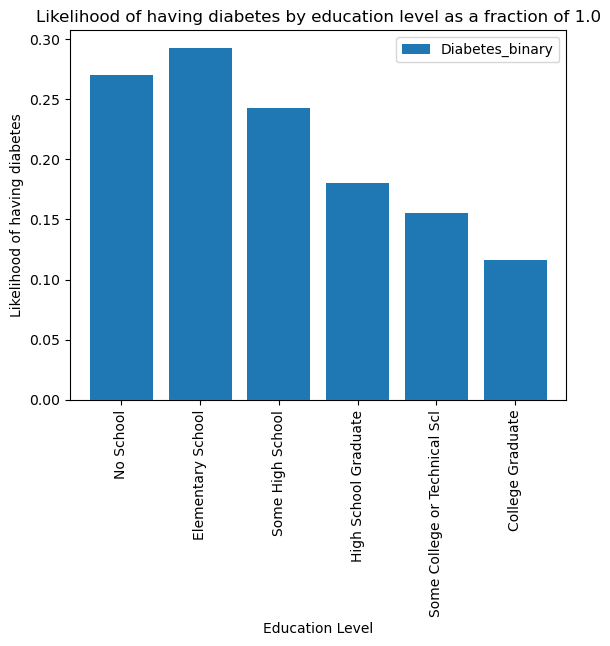

In [57]:
#plotting the relationship between Education level and the likelihood that population surveyed had Diabetes
pd_bar = education_diabetes.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Education Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Likelihood of having diabetes by education level as a fraction of 1.0")


Text(0, 1, 'Education Level')

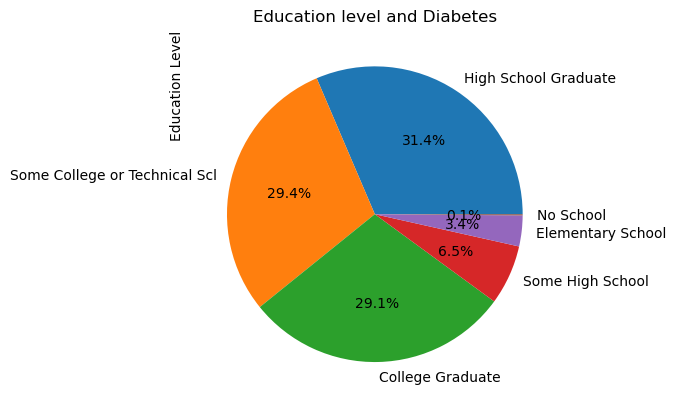

In [58]:
#To analyze this relationship in a clearer way, plotting distribution along education level of those who answwered 'yes' to diabetes
diabetes_yes = df_3.loc[df_3["Diabetes_binary"] == 1.0] 

diabetes_dist = diabetes_yes['Education'].value_counts()

pd_pie = diabetes_dist.plot(kind='pie', autopct='%1.1f%%', title='Education level and Diabetes')
pd_pie.set_ylabel("Education Level", loc='top')

In [59]:
#conducting ANOVA test to see how statistically significant the results are 
s_df = df_3.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)


group0 = s_df[s_df["Education"] == "No School"]["Diabetes_binary"]
group1 = s_df[s_df["Education"] == "Elementary School"]["Diabetes_binary"]
group2 = s_df[s_df["Education"] == "Some High School"]["Diabetes_binary"]
group3 = s_df[s_df["Education"] == "High School Graduate"]["Diabetes_binary"]
group4 = s_df[s_df["Education"] == "Some College or Technical Scl"]["Diabetes_binary"]
group5 = s_df[s_df["Education"] == "College Graduate"]["Diabetes_binary"]

In [60]:

st.f_oneway(group0, group1, group2, group3, group4, group5)
#Result shows statistical significance

F_onewayResult(statistic=50.351389537447304, pvalue=4.50693214725058e-52)

In [61]:
#now seeing the relationship between Diabetes and daily consumption of Fruits and Veggies
fruits_veg_df = diabetes_df[["Diabetes_binary", "Fruits", "Veggies"]]
fruits_veg_df

,Diabetes_binary,Fruits,Veggies
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
...,...,...,...
253675,0.0,1.0,1.0
253676,1.0,0.0,0.0
253677,0.0,1.0,0.0
253678,0.0,1.0,1.0


In [62]:
#making another column for the overall score of whether someone eats both daily fruits and veggies
fruits_veg_df['Diet rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]
fruits_veg_df

C:\Users\michaelz\AppData\Local\Temp\ipykernel_57576\694269903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruits_veg_df['Diet rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]


,Diabetes_binary,Fruits,Veggies,Diet rating
0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,2.0
4,0.0,1.0,1.0,2.0
...,...,...,...,...
253675,0.0,1.0,1.0,2.0
253676,1.0,0.0,0.0,0.0
253677,0.0,1.0,0.0,1.0
253678,0.0,1.0,1.0,2.0


Text(0, 1, 'Health rating')

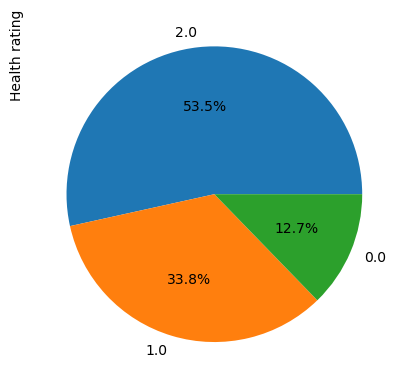

In [63]:
#plotting how much of the population eats fruits and veg daily, the percentage that eats one of those two daily, and the percentage 
#that eats none daily
health_value = fruits_veg_df["Diet rating"].value_counts()
pd_pie = health_value.plot(kind='pie', autopct='%1.1f%%')
pd_pie.set_ylabel("Health rating", loc='top')

In [64]:
#we are looking at the diabetes rate of the respondents who ate both fruit and vegetables, verses those who ate neither.
new_df = fruits_veg_df.loc[fruits_veg_df["Diet rating"] != 1.0]
new_df2 = new_df[["Diabetes_binary", "Diet rating"]]
new_df2


,Diabetes_binary,Diet rating
1,0.0,0.0
3,0.0,2.0
4,0.0,2.0
5,0.0,2.0
6,0.0,0.0
...,...,...
253672,0.0,2.0
253673,0.0,2.0
253675,0.0,2.0
253676,1.0,0.0


In [65]:
#making another column where those who eat no daily fruits and veggies have a 'poor' diet rating, those who eat both daily have a 'Good'
#diet rating
new_df2['Diet rating'] = new_df['Diet rating'].map({0.0:'Poor', 2.0:'Good'}) 
new_df2

C:\Users\michaelz\AppData\Local\Temp\ipykernel_57576\4195700257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['Diet rating'] = new_df['Diet rating'].map({0.0:'Poor', 2.0:'Good'})


,Diabetes_binary,Diet rating
1,0.0,Poor
3,0.0,Good
4,0.0,Good
5,0.0,Good
6,0.0,Poor
...,...,...
253672,0.0,Good
253673,0.0,Good
253675,0.0,Good
253676,1.0,Poor


In [66]:
#finding the likelihood that someone answered as Diabetic based on whether their diet is 'poor' or 'good'
diet_mean = new_df2.groupby("Diet rating").mean()
diet_mean

,Diabetes_binary
Diet rating,
Good,0.139968
Poor,0.180266


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by diet habits')

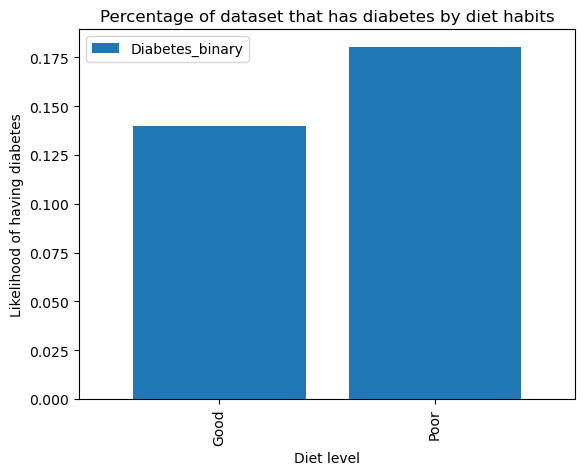

In [67]:
#plotting this relationship between daily fruits/veg consumption and having diabetes
pd_bar = diet_mean.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Diet level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by diet habits")

In [68]:
samp_df = new_df2.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
option1 = samp_df[samp_df["Diet rating"] == "Good"]["Diabetes_binary"]
option2 = samp_df[samp_df["Diet rating"] == "Poor"]["Diabetes_binary"]

st.ttest_ind(option1, option2, equal_var=False)

#ttest shows statistical significance

TtestResult(statistic=-5.620414735308868, pvalue=2.03144798790565e-08, df=4103.524391300162)

In [69]:
#now looking at the relationship between diabetes and the other health issues listed in the survey
health_issues_df = diabetes_df[["Diabetes_binary", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", ]]
health_issues_df["Health Problem Level"] = health_issues_df["HighBP"] + health_issues_df["HighChol"] + health_issues_df["Stroke"] + health_issues_df["HeartDiseaseorAttack"]
health_issues_df

C:\Users\michaelz\AppData\Local\Temp\ipykernel_57576\3036860610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_issues_df["Health Problem Level"] = health_issues_df["HighBP"] + health_issues_df["HighChol"] + health_issues_df["Stroke"] + health_issues_df["HeartDiseaseorAttack"]


,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
0,0.0,1.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,2.0
253676,1.0,1.0,1.0,0.0,0.0,2.0
253677,0.0,0.0,0.0,0.0,0.0,0.0
253678,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
#seeing the amount of people who had one or more of the other health issues, based on whether they are Diabetic or not
health_issues_df.groupby("Diabetes_binary")["Health Problem Level"].value_counts()

Diabetes_binary  Health Problem Level
0.0              0.0                     78475
                 1.0                     65384
                 2.0                     39665
                 3.0                      9549
                 4.0                      1304
1.0              2.0                     14953
                 1.0                      9832
                 3.0                      5525
                 0.0                      3609
                 4.0                      1178
Name: count, dtype: int64

In [71]:

yes_diabetes = health_issues_df[health_issues_df["Diabetes_binary"] == 1.0]
yes_diabetes

,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
8,1.0,1.0,1.0,0.0,1.0,3.0
10,1.0,0.0,0.0,0.0,0.0,0.0
13,1.0,1.0,1.0,0.0,0.0,2.0
17,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
253659,1.0,0.0,1.0,0.0,0.0,1.0
253668,1.0,0.0,1.0,0.0,1.0,2.0
253670,1.0,1.0,1.0,0.0,1.0,3.0
253676,1.0,1.0,1.0,0.0,0.0,2.0


Text(0, 1, 'Health Problem Rating')

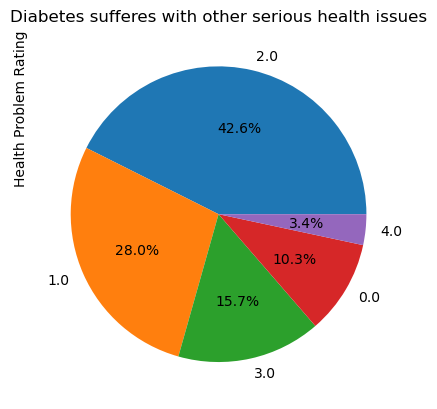

In [72]:
#Pie chart of those with diabetes- what percentage of them had 0, 1, 2, 3 or 4 other serious health conditions
yes_diabetes1 = yes_diabetes["Health Problem Level"].value_counts()
pd_pie = yes_diabetes1.plot(kind='pie', autopct='%1.1f%%', title='Diabetes sufferes with other serious health issues')
pd_pie.set_ylabel("Health Problem Rating", loc='top')

In [73]:
no_diabetes = health_issues_df[health_issues_df["Diabetes_binary"] == 0.0]
no_diabetes

,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
0,0.0,1.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
253673,0.0,1.0,0.0,0.0,0.0,1.0
253674,0.0,0.0,0.0,0.0,0.0,0.0
253675,0.0,1.0,1.0,0.0,0.0,2.0
253677,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 1, 'Health Problem Rating')

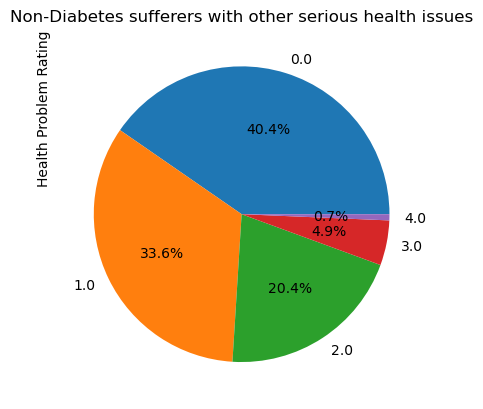

In [74]:
#Pie chart of those without diabetes- what percentage of them had 0, 1, 2, 3 or 4 other serious health conditions
no_diabetes1 = no_diabetes["Health Problem Level"].value_counts()
pd_pie = no_diabetes1.plot(kind='pie', autopct='%1.1f%%', title='Non-Diabetes sufferers with other serious health issues')
pd_pie.set_ylabel("Health Problem Rating", loc='top')

In [75]:
#result shows that those with diabetes are much more likely to have more serious health conditions 

sample_df = health_issues_df.sample(frac=0.05, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
yesdiab = sample_df[sample_df["Diabetes_binary"] == 1.0]["Health Problem Level"]
nodiab = sample_df[sample_df["Diabetes_binary"] == 0.0]["Health Problem Level"]

st.ttest_ind(yesdiab, nodiab, equal_var=False)

TtestResult(statistic=33.31062093573368, pvalue=1.3535389711097988e-199, df=2348.686196366028)

In [ ]:
#ttest shows statistical significance 